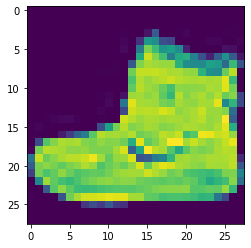

In [11]:
import util
import tensorflow as tf
import matplotlib.pyplot as plt

x_train, y_train = util.load_mnist()
x_test, y_test = util.load_mnist(kind = "t10k")

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1) 

plt.imshow(x_train[0])


In [12]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.Conv2D(filters=8, kernel_size=5, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)),
    layers.Conv2D(filters=16, kernel_size=3, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=3, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)), 
    layers.Conv2D(filters=32, kernel_size=3, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)),
    layers.AveragePooling2D(1),
    layers.Flatten(),
    layers.Dense(10, activation="relu"),
    layers.Softmax()
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 8)         208       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 32)          9248      
_________________________________________________________________
average_pooling2d_3 (Average (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0126 - accuracy: 0.6374 - val_loss: 0.4537 - val_accuracy: 0.8393
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3826 - accuracy: 0.8629 - val_loss: 0.3898 - val_accuracy: 0.8545
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3362 - accuracy: 0.8782 - val_loss: 0.3722 - val_accuracy: 0.8694
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3114 - accuracy: 0.8857 - val_loss: 0.3516 - val_accuracy: 0.8702
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2938 - accuracy: 0.8911 - val_loss: 0.3520 - val_accuracy: 0.8751
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2792 - accuracy: 0.8957 - val_loss: 0.3486 - val_accuracy: 0.8766
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2690 - accuracy: 0.9005 - val_loss: 0.3676 - val_ac

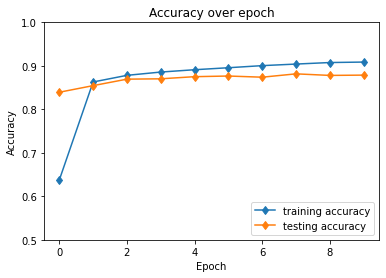

In [14]:
plt.figure()
plt.plot(history.history['accuracy'], "-d", label="training accuracy")
plt.plot(history.history['val_accuracy'], "-d", label="testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.title("Accuracy over epoch")
plt.legend(loc='lower right')
plt.show()
plt.close()